In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Se crean funciones para facilitar la importación de datasets a lo largo de todo el estudio

def csv_a_DF(id_dataset,encoding = 'UTF-8',separador = ','):
    ruta = 'C:\\Users\\sergio\\Desktop\\repos\\datasets rural\\codificados\\'
    extension = '.csv'
    return pd.read_csv(ruta + id_dataset + extension, sep=separador, encoding=encoding, index_col=False)

def xlsx_a_DF(id_dataset,hoja='datos'):
    ruta = 'C:\\Users\\sergio\\Desktop\\repos\\datasets rural\\codificados\\'
    extension = '.xlsx'
    return pd.read_excel(ruta + id_dataset + extension, sheet_name=hoja)

1) **Importación de CSVs hacia DFs** para su exploración inicial. El objetivo es generar un gráfico comparativo sobre la evolución de las existencias de cada tipo de ganado, en los años alcanzados por los datasets:

In [3]:
# Creación de DFs de existencias generales por ganado, anuales, alcance nacional, 2008 a 2019, creados por SENASA:

ex_bovinas_gen = csv_a_DF('26','Latin-1')
ex_equinas_gen = csv_a_DF('47','Latin-1')
ex_caprinas_gen = csv_a_DF('45','Latin-1')
ex_ovinas_gen = csv_a_DF('53','Latin-1')
ex_porcinas_gen = csv_a_DF('57','Latin-1')

2) Se realiza **primer chequeo de cada DFs** para identificar los campos que incluyen y detectar datos faltantes (nulos).

In [4]:
ex_bovinas_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indice_tiempo  12 non-null     int64  
 1   vacas          12 non-null     int64  
 2   vaquillonas    12 non-null     int64  
 3   novillos       12 non-null     int64  
 4   novillitos     12 non-null     int64  
 5   terneros       12 non-null     int64  
 6   terneras       12 non-null     int64  
 7   toros          12 non-null     int64  
 8   toritos        7 non-null      float64
 9   bueyes         12 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 1.1 KB


In [5]:
display(ex_bovinas_gen)

,indice_tiempo,vacas,vaquillonas,novillos,novillitos,terneros,terneras,toros,toritos,bueyes
0,2008,23712136,8203242,4804549,5312143,7139558,7144966,1255957,NaN,10571
1,2009,22485247,7875606,4663078,5064204,6505799,6629150,1196362,NaN,10465
2,2010,20540972,7209738,4138245,4470793,5678652,5802958,1096852,NaN,11533
3,2011,20060138,7303025,3649056,4114646,5795376,6008279,1029460,NaN,12681
4,2012,21101050,7583466,3423570,3933277,6238387,6496993,1074252,NaN,14866
5,2013,21924857,7444723,3213426,3880271,6538273,6831439,1114812,36700.0,11896
6,2014,22264909,7462688,2944415,4038433,6720528,6996985,1073206,133006.0,12374
7,2015,22381768,7424662,2983523,4050333,6513359,6845001,1056167,162654.0,12381
8,2016,22945852,7545259,2823732,3952320,6876606,7230931,1065162,184947.0,11969
9,2017,23362043,7765860,2783610,4024388,6894611,7233231,1074125,11101.0,204818


In [6]:
ex_bovinas_gen['total_anio_bovino'] = ex_bovinas_gen.iloc[:, 1:].sum(axis=1).astype(int)
display(ex_bovinas_gen)

,indice_tiempo,vacas,vaquillonas,novillos,novillitos,terneros,terneras,toros,toritos,bueyes,total_anio_bovino
0,2008,23712136,8203242,4804549,5312143,7139558,7144966,1255957,NaN,10571,57583122
1,2009,22485247,7875606,4663078,5064204,6505799,6629150,1196362,NaN,10465,54429911
2,2010,20540972,7209738,4138245,4470793,5678652,5802958,1096852,NaN,11533,48949743
3,2011,20060138,7303025,3649056,4114646,5795376,6008279,1029460,NaN,12681,47972661
4,2012,21101050,7583466,3423570,3933277,6238387,6496993,1074252,NaN,14866,49865861
5,2013,21924857,7444723,3213426,3880271,6538273,6831439,1114812,36700.0,11896,50996397
6,2014,22264909,7462688,2944415,4038433,6720528,6996985,1073206,133006.0,12374,51646544
7,2015,22381768,7424662,2983523,4050333,6513359,6845001,1056167,162654.0,12381,51429848
8,2016,22945852,7545259,2823732,3952320,6876606,7230931,1065162,184947.0,11969,52636778
9,2017,23362043,7765860,2783610,4024388,6894611,7233231,1074125,11101.0,204818,53353787


In [7]:
ex_equinas_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   indice_tiempo        12 non-null     int64
 1   padrillos            12 non-null     int64
 2   caballos             12 non-null     int64
 3   yeguas               12 non-null     int64
 4   potrillos_potrillas  12 non-null     int64
 5   mulas                12 non-null     int64
 6   burros_asnos         12 non-null     int64
dtypes: int64(7)
memory usage: 804.0 bytes


In [8]:
ex_equinas_gen['total_anio_equino'] = ex_equinas_gen.iloc[:, 1:].sum(axis=1)
display(ex_equinas_gen)

,indice_tiempo,padrillos,caballos,yeguas,potrillos_potrillas,mulas,burros_asnos,total_anio_equino
0,2008,41145,979572,726370,137724,30483,129408,2044702
1,2009,78586,951535,746544,147921,33017,34923,1992526
2,2010,51062,920668,767519,150509,30161,29086,1949005
3,2011,61770,914389,783606,168513,31771,33899,1993948
4,2012,59556,954960,851877,197538,33517,39662,2137110
5,2013,62410,988140,919316,240297,38404,46025,2294592
6,2014,68348,1002322,955626,258490,40677,51127,2376590
7,2015,72375,1103142,988373,283417,42914,55019,2545240
8,2016,78395,1057444,1002115,309628,44426,56918,2548926
9,2017,83363,1041698,1030453,339462,45252,59654,2599882


In [9]:
ex_caprinas_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   indice_tiempo       12 non-null     int64  
 1   chivos              12 non-null     int64  
 2   cabras              12 non-null     int64  
 3   cabritos            12 non-null     int64  
 4   capones             11 non-null     float64
 5   cabrillas_chivitos  11 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 708.0 bytes


In [10]:
display(ex_caprinas_gen)

,indice_tiempo,chivos,cabras,cabritos,capones,cabrillas_chivitos
0,2008,1769442,1409227,420840,NaN,NaN
1,2009,1975474,1224779,368807,2880.0,5801.0
2,2010,1586451,1728045,299397,23540.0,118542.0
3,2011,1327419,1872509,410057,31612.0,136310.0
4,2012,1363184,1962212,443476,39732.0,208176.0
5,2013,827955,2197583,568478,59902.0,261964.0
6,2014,789578,2413889,600219,73207.0,304615.0
7,2015,755973,2311187,651781,85041.0,397275.0
8,2016,688462,2566726,630501,96938.0,444669.0
9,2017,576841,2519289,659999,82849.0,460823.0


In [11]:
ex_caprinas_gen['total_anio_caprino'] = ex_caprinas_gen.iloc[:, 1:].sum(axis=1).astype(int)
display(ex_caprinas_gen)

,indice_tiempo,chivos,cabras,cabritos,capones,cabrillas_chivitos,total_anio_caprino
0,2008,1769442,1409227,420840,NaN,NaN,3599509
1,2009,1975474,1224779,368807,2880.0,5801.0,3577741
2,2010,1586451,1728045,299397,23540.0,118542.0,3755975
3,2011,1327419,1872509,410057,31612.0,136310.0,3777907
4,2012,1363184,1962212,443476,39732.0,208176.0,4016780
5,2013,827955,2197583,568478,59902.0,261964.0,3915882
6,2014,789578,2413889,600219,73207.0,304615.0,4181508
7,2015,755973,2311187,651781,85041.0,397275.0,4201257
8,2016,688462,2566726,630501,96938.0,444669.0,4427296
9,2017,576841,2519289,659999,82849.0,460823.0,4299801


In [12]:
ex_ovinas_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   indice_tiempo          12 non-null     int64
 1   carneros_cbz           12 non-null     int64
 2   ovejas_cbz             12 non-null     int64
 3   borregos_cbz           12 non-null     int64
 4   capones_cbz            12 non-null     int64
 5   corderos_corderas_cbz  12 non-null     int64
dtypes: int64(6)
memory usage: 708.0 bytes


In [13]:
ex_ovinas_gen['total_anio_ovino'] = ex_ovinas_gen.iloc[:, 1:].sum(axis=1)
display(ex_ovinas_gen)

,indice_tiempo,carneros_cbz,ovejas_cbz,borregos_cbz,capones_cbz,corderos_corderas_cbz,total_anio_ovino
0,2008,603403,8898738,2231588,1608096,2646298,15988123
1,2009,586930,8609142,2052680,1566723,2463026,15278501
2,2010,564332,8580056,1965516,1487688,2427154,15024746
3,2011,576162,8436154,1938866,1417208,2363756,14732146
4,2012,571740,8397582,1900922,1372168,2454491,14696903
5,2013,585831,8325029,1887544,1312906,2463579,14574889
6,2014,581433,8214688,1883954,1290437,2563186,14533698
7,2015,606227,8499019,1926727,1267144,2560369,14859486
8,2016,573235,8420305,1988929,1296240,2585612,14864321
9,2017,567391,8371694,1986130,1260896,2560455,14746566


In [14]:
ex_porcinas_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   indice_tiempo                   12 non-null     int64  
 1   padrillos                       12 non-null     int64  
 2   cerda                           12 non-null     int64  
 3   lechon                          12 non-null     int64  
 4   capones                         12 non-null     int64  
 5   cachorro                        12 non-null     int64  
 6   machos_enteros_inmunocastrados  9 non-null      float64
 7   cachorra                        6 non-null      float64
dtypes: float64(2), int64(6)
memory usage: 900.0 bytes


In [15]:
display(ex_porcinas_gen)

,indice_tiempo,padrillos,cerda,lechon,capones,cachorro,machos_enteros_inmunocastrados,cachorra
0,2008,107752,675268,982535,793640,485489,NaN,NaN
1,2009,116425,673480,1006937,736454,514258,NaN,NaN
2,2010,119035,667496,1014937,760417,539522,NaN,NaN
3,2011,117525,686446,1102306,760628,573598,10183.0,NaN
4,2012,106976,734138,1229854,659723,686930,8335.0,NaN
5,2013,144460,898428,1475640,791967,877680,33808.0,NaN
6,2014,146658,926515,1610764,833124,844633,53813.0,164405.0
7,2015,144408,946295,1716366,803320,854266,54382.0,207208.0
8,2016,145386,949825,1728568,868066,861919,94034.0,292984.0
9,2017,152522,962881,1728721,989223,908993,123467.0,253631.0


In [16]:
ex_porcinas_gen['total_anio_porcino'] = ex_porcinas_gen.iloc[:, 1:].sum(axis=1).astype(int)
display(ex_porcinas_gen)

,indice_tiempo,padrillos,cerda,lechon,capones,cachorro,machos_enteros_inmunocastrados,cachorra,total_anio_porcino
0,2008,107752,675268,982535,793640,485489,NaN,NaN,3044684
1,2009,116425,673480,1006937,736454,514258,NaN,NaN,3047554
2,2010,119035,667496,1014937,760417,539522,NaN,NaN,3101407
3,2011,117525,686446,1102306,760628,573598,10183.0,NaN,3250686
4,2012,106976,734138,1229854,659723,686930,8335.0,NaN,3425956
5,2013,144460,898428,1475640,791967,877680,33808.0,NaN,4221983
6,2014,146658,926515,1610764,833124,844633,53813.0,164405.0,4579912
7,2015,144408,946295,1716366,803320,854266,54382.0,207208.0,4726245
8,2016,145386,949825,1728568,868066,861919,94034.0,292984.0,4940782
9,2017,152522,962881,1728721,989223,908993,123467.0,253631.0,5119438


3) Se observa que existen valores NULL en algunos campos de los dataset de Porcinos, Caprinos y Bovinos. Sin embargo, luego de analizar los datos, se percibe que los valores faltantes no serán significativos en el resultado final de esta sección del estudio. Por otra parte, no se detectaron otras irregularidades en los datasets involucrados, por lo cual se procede a la preparación de los datos y generación de gráficas. A continuación, se reduce la dimensionalidad de los dataframes, dejando solo los campos útiles.

In [17]:
columnas_drop_bov = ['vacas', 'vaquillonas', 'novillos', 'novillitos', 'terneros', 'terneras', 'toros', 'toritos', 'bueyes']
columnas_drop_eq = ['padrillos', 'caballos', 'yeguas', 'potrillos_potrillas', 'mulas', 'burros_asnos']
columnas_drop_cap = ['chivos', 'cabras', 'cabritos', 'capones', 'cabrillas_chivitos']
columnas_drop_ov = ['carneros_cbz', 'ovejas_cbz', 'borregos_cbz', 'capones_cbz', 'corderos_corderas_cbz']
columnas_drop_por = ['padrillos', 'cerda', 'lechon', 'capones', 'cachorro', 'machos_enteros_inmunocastrados', 'cachorra']

ex_bovinas_gen_totales = ex_bovinas_gen.drop(columns = columnas_drop_bov)
ex_equinas_gen_totales = ex_equinas_gen.drop(columns = columnas_drop_eq)
ex_caprinas_gen_totales = ex_caprinas_gen.drop(columns = columnas_drop_cap)
ex_ovinas_gen_totales = ex_ovinas_gen.drop(columns = columnas_drop_ov)
ex_porcinas_gen_totales = ex_porcinas_gen.drop(columns = columnas_drop_por)

In [18]:
prom_ex_bov = ex_bovinas_gen_totales['total_anio_bovino'].mean()

In [19]:
ex_bovinas_gen_totales.describe()

,indice_tiempo,total_anio_bovino
count,12.000000,1.200000e+01
mean,2013.500000,5.222830e+07
std,3.605551,2.658288e+06
min,2008.000000,4.797266e+07
25%,2010.750000,5.071376e+07
50%,2013.500000,5.214166e+07
75%,2016.250000,5.393329e+07
max,2019.000000,5.758312e+07


In [20]:
prom_ex_bov

52228298.25

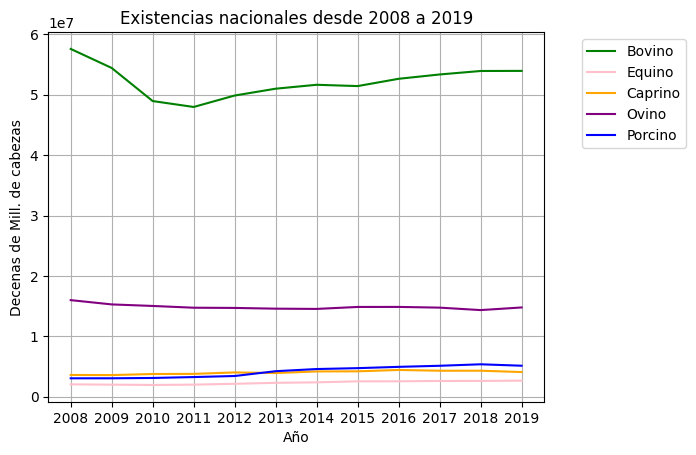

In [47]:
plt.plot(ex_bovinas_gen_totales['indice_tiempo'], ex_bovinas_gen_totales['total_anio_bovino'], color='green', label='Bovino')
plt.xlabel('Año')
plt.ylabel('Decenas de Mill. de cabezas')
plt.title('Existencias nacionales desde 2008 a 2019')
plt.xticks(range(2008, 2020))
plt.grid()

plt.plot(ex_equinas_gen_totales['indice_tiempo'], ex_equinas_gen_totales['total_anio_equino'], color='pink', label='Equino')
plt.xticks(range(2008, 2020))
plt.grid()

plt.plot(ex_caprinas_gen_totales['indice_tiempo'], ex_caprinas_gen_totales['total_anio_caprino'], color='orange', label='Caprino')
plt.xticks(range(2008, 2020))
plt.grid()

plt.plot(ex_ovinas_gen_totales['indice_tiempo'], ex_ovinas_gen_totales['total_anio_ovino'], color='purple', label='Ovino')
plt.xticks(range(2008, 2020))
plt.grid()

plt.plot(ex_porcinas_gen_totales['indice_tiempo'], ex_porcinas_gen_totales['total_anio_porcino'], color='blue', label='Porcino')
plt.xticks(range(2008, 2020))
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# plt.savefig('existencias_ganaderas_evo_2008-2019 - fig 1.jpg', bbox_inches='tight')
plt.show()


In [22]:
# Se genera gráfico de torta indicando el porcentaje que representa cada tipo de ganado entre 2008 y 2019, promedio.

dicc_distribucion = {
                        'Ganado' : ['Bovino','Porcino','Ovino','Caprino','Equino'],
                        'ex_prom' : [ex_bovinas_gen_totales['total_anio_bovino'].mean(),
                                     ex_porcinas_gen_totales['total_anio_porcino'].mean(),
                                     ex_ovinas_gen_totales['total_anio_ovino'].mean(),
                                     ex_caprinas_gen_totales['total_anio_caprino'].mean(),
                                     ex_equinas_gen_totales['total_anio_equino'].mean()]
}

In [23]:
df_distribucion = pd.DataFrame(dicc_distribucion)

In [24]:
display(df_distribucion)

,Ganado,ex_prom
0,Bovino,5.222830e+07
1,Porcino,4.162669e+06
2,Ovino,1.486779e+07
3,Caprino,4.011302e+06
4,Equino,2.312150e+06


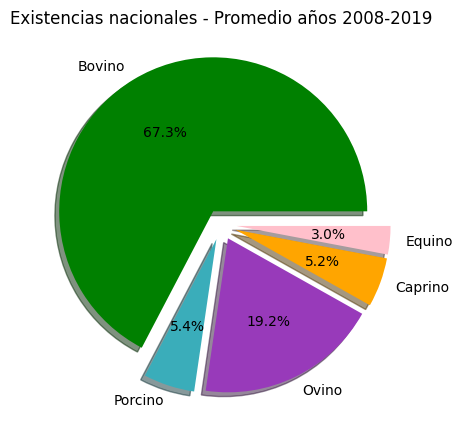

In [56]:
plt.figure(figsize=(5,5))
plt.title('Existencias nacionales - Promedio años 2008-2019')
explodeGanado=[0.1,0.1,0.1,0.1,0.1]
colores_ex_dist=["green","#3AADBA","#983ABA","orange","pink"]
plt.pie(df_distribucion.ex_prom, labels=df_distribucion.Ganado, colors=colores_ex_dist, explode=explodeGanado, shadow=True, autopct='%1.1f%%', startangle=0)
#plt.savefig('dist_de_existencias_prom-fig 2.jpg')
plt.show()

A continuación se importan 2 datasets con información referida a la faena a nivel nacional entre 2013 y 2019. Posteriormente se utilizará dicha información para obtener la tasa de extracción lograda en cada uno de esos años, para cada tipo de ganado en estudio, y algunas gráficas adicionales.

In [26]:
faena_VPO = xlsx_a_DF('44','datos_faena')
faena_EC = xlsx_a_DF('18','datos')

In [27]:
faena_VPO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ganado  4 non-null      object
 1   2013    4 non-null      int64 
 2   2014    4 non-null      int64 
 3   2015    4 non-null      int64 
 4   2016    4 non-null      int64 
 5   2017    4 non-null      int64 
 6   2018    4 non-null      int64 
 7   2019    4 non-null      int64 
 8   2020    4 non-null      int64 
 9   2021    4 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 452.0+ bytes


In [28]:
# Dado que el dataframe posee en las columnas los años. Para estandarizar la traspondremos
# y acomodaremos el formato para que quede igual a los demás datasets utilizados.

faena_VPO_t = faena_VPO.transpose()
faena_VPO_t.columns = faena_VPO_t.iloc[0]
faena_VPO_t = faena_VPO_t[1:]
faena_VPO_t = faena_VPO_t.reset_index()
faena_VPO_t = faena_VPO_t.rename(columns={'index':'Anio'})
faena_VPO_t.columns.name = 'index'

In [29]:
faena_VPO_t

index,Anio,Vacunos (cab),Porcinos (cab),Ovinos (cab),Aviar (cab)
0,2013,12625512,4805499,1094400,732463207
1,2014,12100979,5110083,1121032,729243582
2,2015,12156600,5523715,1005234,729929066
3,2016,11720350,5861104,937621,704022586
4,2017,12616459,6325078,986798,722118903
5,2018,13452831,6653088,907150,711459539
6,2019,13872888,6747243,918999,756949125
7,2020,14008209,7006091,938518,757925909
8,2021,12987232,7484269,938698,741395104


In [30]:
faena_VPO_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Anio             9 non-null      int64 
 1   Vacunos (cab)    9 non-null      object
 2   Porcinos  (cab)  9 non-null      object
 3   Ovinos  (cab)    9 non-null      object
 4   Aviar  (cab)     9 non-null      object
dtypes: int64(1), object(4)
memory usage: 492.0+ bytes


In [31]:
# Como no estamos analizando la producción Aviar, descartaremos esa columna para reducir dimensionalidad.

faena_VPO_t = faena_VPO_t.drop(columns = 'Aviar  (cab)')

In [32]:
faena_EC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Año                                  9 non-null      int64
 1   Aves (Mill.C)                        9 non-null      int64
 2   Gansos y faisanes (cab)              9 non-null      int64
 3   Lechones (cab)                       9 non-null      int64
 4   Cabritos (cab)                       9 non-null      int64
 5   Corderitos (cab)                     9 non-null      int64
 6   Conejos (cab)                        9 non-null      int64
 7   Liebres (cab)                        9 non-null      int64
 8   Equinos (cab)                        9 non-null      int64
 9   Ciervos, jabalíes y antílopes (cab)  9 non-null      int64
 10  Nutrias (cab)                        9 non-null      int64
dtypes: int64(11)
memory usage: 924.0 bytes


In [33]:
faena_EC

,Año,Aves (Mill.C),Gansos y faisanes (cab),Lechones (cab),Cabritos (cab),Corderitos (cab),Conejos (cab),Liebres (cab),Equinos (cab),"Ciervos, jabalíes y antílopes (cab)",Nutrias (cab)
0,2013,731,2373,83042,135415,459280,80321,1104623,97319,2313,9170
1,2014,728,337,58287,123286,440767,55823,1011784,103497,1680,9013
2,2015,727,0,56826,116588,492886,49583,1168273,96741,1275,21923
3,2016,704,22,60158,108329,378815,46261,779538,99728,2183,6462
4,2017,722,18,72786,108495,407822,32416,544847,102197,1514,7986
5,2018,711,0,67538,103226,414134,29509,846614,116127,3024,3022
6,2019,757,16,70750,106107,394993,22948,690143,111870,839,7205
7,2020,758,0,35469,84141,400925,13050,7875,91774,1305,3382
8,2021,741,0,46208,84077,387410,22021,651518,109672,1923,4252


Luego del análisis exploratorio inicial de la información sobre la faena anual, se descrube que existe una incongruencia

In [34]:
# Este dataframe se encuentra correctamente organizado, pero contiene varios campos que no utilizaremos.
# Se procede a eliminar dichos campos, manteniendo únicamente el 'Año', 'Cabritos (cab)' 
# y 'Equinos (cab)', para poder complementar la información del dataset trabajado anteriormente.

columnas_drop_EC = ['Aves (Mill.C)', 'Gansos y faisanes (cab)', 'Corderitos (cab)', 'Lechones (cab)' , 'Conejos (cab)', 'Liebres (cab)', 'Ciervos, jabalíes y antílopes (cab)', 'Nutrias (cab)']

faena_EC = faena_EC.drop(columns = columnas_drop_EC)


In [35]:
# Se editan los dataframes para que solo contengan información hasta 2019 inclusive.

faena_EC = faena_EC[faena_EC['Año'] < 2020]
faena_VPO_t = faena_VPO_t[faena_VPO_t['Anio'] < 2020]

In [36]:
# Se realiza mismo trabajo para los dataframes referidos a las existencias, eliminando la información de años anteriores a 2013

ex_bovinas_gen_totales_13_19 = ex_bovinas_gen_totales[ex_bovinas_gen_totales['indice_tiempo'] > 2012]
ex_porcinas_gen_totales_13_19 = ex_porcinas_gen_totales[ex_porcinas_gen_totales['indice_tiempo'] > 2012]
ex_ovinas_gen_totales_13_19 = ex_ovinas_gen_totales[ex_ovinas_gen_totales['indice_tiempo'] > 2012]
ex_caprinas_gen_totales_13_19 = ex_caprinas_gen_totales[ex_caprinas_gen_totales['indice_tiempo'] > 2012]
ex_equinas_gen_totales_13_19 = ex_equinas_gen_totales[ex_equinas_gen_totales['indice_tiempo'] > 2012]

In [37]:
faena_VPO_t = faena_VPO_t.rename(columns={'Anio': 'indice_tiempo'})

En las siguientes celdas se terminan de configurar los dataframes para calcular y presentar las tasas de extracción buscadas.

In [38]:
ex_porcinas_gen_totales_13_19 = ex_porcinas_gen_totales_13_19.reset_index(drop=True)
ex_bovinas_gen_totales_13_19 = ex_bovinas_gen_totales_13_19.reset_index(drop=True)
ex_ovinas_gen_totales_13_19 = ex_ovinas_gen_totales_13_19.reset_index(drop=True)
ex_caprinas_gen_totales_13_19 = ex_caprinas_gen_totales_13_19.reset_index(drop=True)
ex_equinas_gen_totales_13_19 = ex_equinas_gen_totales_13_19.reset_index(drop=True)

In [39]:
ex_porcinas_gen_totales_13_19['faena general'] = faena_VPO_t['Porcinos  (cab)'].astype(int)
ex_bovinas_gen_totales_13_19['faena general'] = faena_VPO_t['Vacunos (cab)'].astype(int)
ex_ovinas_gen_totales_13_19['faena general'] = faena_VPO_t['Ovinos  (cab)'].astype(int)
ex_caprinas_gen_totales_13_19['faena Cabritos'] = faena_EC['Cabritos (cab)'].astype(int)
ex_equinas_gen_totales_13_19['faena general'] = faena_EC['Equinos (cab)'].astype(int)

In [40]:
ex_porcinas_gen_totales_13_19['tasa_e (%)'] = ((ex_porcinas_gen_totales_13_19['faena general'] / ex_porcinas_gen_totales_13_19['total_anio_porcino'])*100).round(2)
ex_bovinas_gen_totales_13_19['tasa_e (%)'] = ((ex_bovinas_gen_totales_13_19['faena general'] / ex_bovinas_gen_totales_13_19['total_anio_bovino'])*100).round(2)
ex_ovinas_gen_totales_13_19['tasa_e (%)'] = ((ex_ovinas_gen_totales_13_19['faena general'] / ex_ovinas_gen_totales_13_19['total_anio_ovino'])*100).round(2)
ex_caprinas_gen_totales_13_19['tasa_e (%)'] = ((ex_caprinas_gen_totales_13_19['faena Cabritos'] / ex_caprinas_gen_totales_13_19['total_anio_caprino'])*100).round(2)
ex_equinas_gen_totales_13_19['tasa_e (%)'] = ((ex_equinas_gen_totales_13_19['faena general'] / ex_equinas_gen_totales_13_19['total_anio_equino'])*100).round(2)

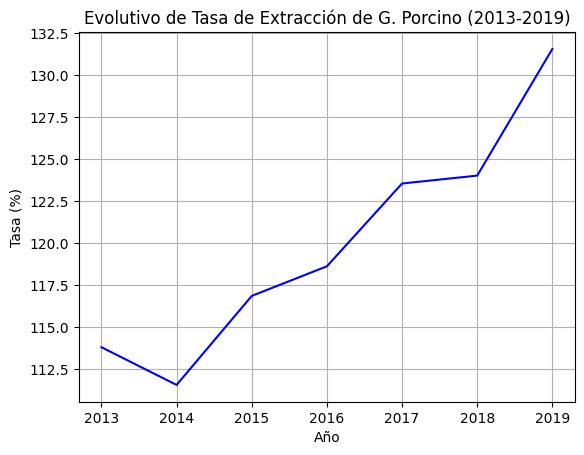

In [41]:
plt.plot(ex_porcinas_gen_totales_13_19['indice_tiempo'], ex_porcinas_gen_totales_13_19['tasa_e (%)'], color='blue')
plt.xlabel('Año')
plt.ylabel('Tasa (%)')
plt.title('Evolutivo de Tasa de Extracción de G. Porcino (2013-2019)')
plt.xticks(range(2013, 2020))
plt.grid()
# plt.savefig('t_e porcino - fig 7.1.jpg', bbox_inches='tight')

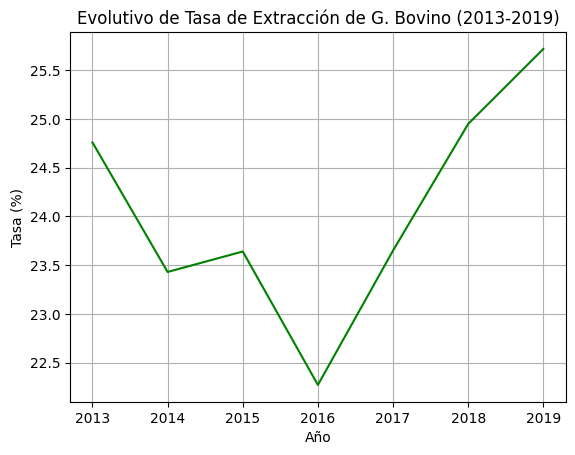

In [42]:
plt.plot(ex_bovinas_gen_totales_13_19['indice_tiempo'], ex_bovinas_gen_totales_13_19['tasa_e (%)'], color='green')
plt.xlabel('Año')
plt.ylabel('Tasa (%)')
plt.title('Evolutivo de Tasa de Extracción de G. Bovino (2013-2019)')
plt.xticks(range(2013, 2020))
plt.grid()
#plt.savefig('t_e bovino - fig 7.2.jpg', bbox_inches='tight')

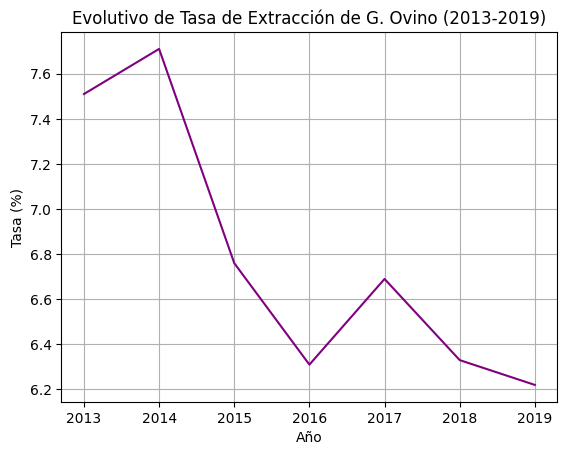

In [43]:
plt.plot(ex_ovinas_gen_totales_13_19['indice_tiempo'], ex_ovinas_gen_totales_13_19['tasa_e (%)'], color='purple')
plt.xlabel('Año')
plt.ylabel('Tasa (%)')
plt.title('Evolutivo de Tasa de Extracción de G. Ovino (2013-2019)')
plt.xticks(range(2013, 2020))
plt.grid()
#plt.savefig('t_e ovino - fig 7.3.jpg', bbox_inches='tight')

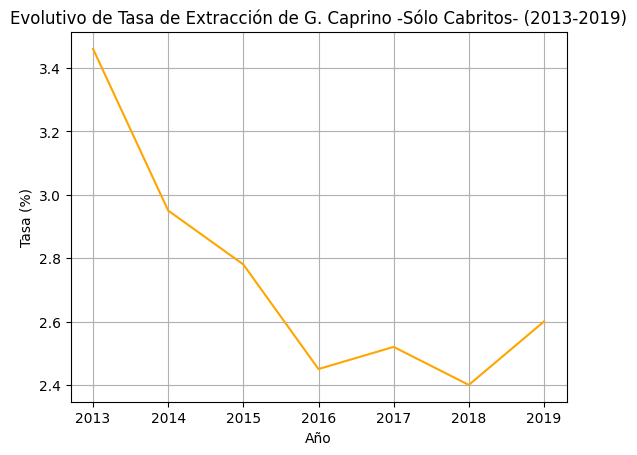

In [44]:
plt.plot(ex_caprinas_gen_totales_13_19['indice_tiempo'], ex_caprinas_gen_totales_13_19['tasa_e (%)'], color='orange')
plt.xlabel('Año')
plt.ylabel('Tasa (%)')
plt.title('Evolutivo de Tasa de Extracción de G. Caprino -Sólo Cabritos- (2013-2019)')
plt.xticks(range(2013, 2020))
plt.grid()
#plt.savefig('t_e caprino - fig 7.4.jpg', bbox_inches='tight')

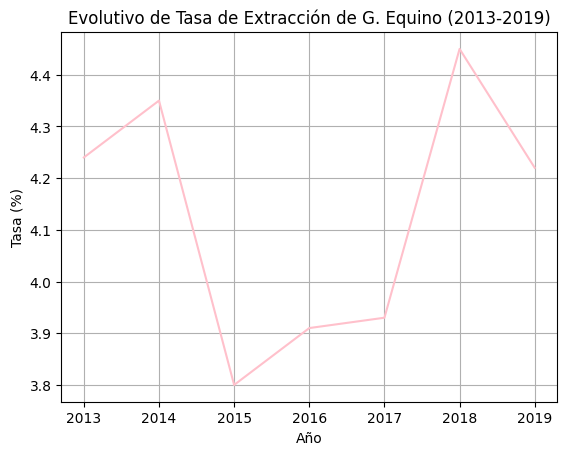

In [45]:
plt.plot(ex_equinas_gen_totales_13_19['indice_tiempo'], ex_equinas_gen_totales_13_19['tasa_e (%)'], color='pink')
plt.xlabel('Año')
plt.ylabel('Tasa (%)')
plt.title('Evolutivo de Tasa de Extracción de G. Equino (2013-2019)')
plt.xticks(range(2013, 2020))
plt.grid()
#plt.savefig('t_e equino - fig 7.5.jpg', bbox_inches='tight')

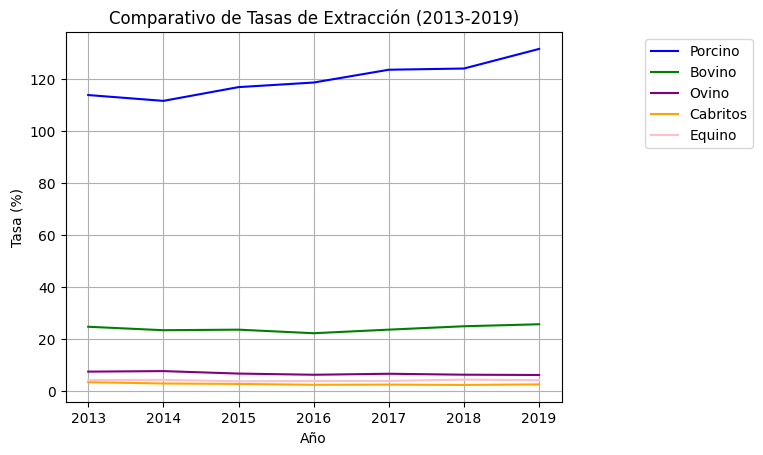

In [46]:
plt.plot(ex_porcinas_gen_totales_13_19['indice_tiempo'], ex_porcinas_gen_totales_13_19['tasa_e (%)'], color='blue',label='Porcino')
plt.xticks(range(2013, 2020))

plt.plot(ex_bovinas_gen_totales_13_19['indice_tiempo'], ex_bovinas_gen_totales_13_19['tasa_e (%)'], color='green',label='Bovino')
plt.xticks(range(2013, 2020))

plt.plot(ex_ovinas_gen_totales_13_19['indice_tiempo'], ex_ovinas_gen_totales_13_19['tasa_e (%)'], color='purple', label='Ovino')
plt.xticks(range(2013, 2020))

plt.plot(ex_caprinas_gen_totales_13_19['indice_tiempo'], ex_caprinas_gen_totales_13_19['tasa_e (%)'], color='orange',label='Cabritos')
plt.xticks(range(2013, 2020))

plt.plot(ex_equinas_gen_totales_13_19['indice_tiempo'], ex_equinas_gen_totales_13_19['tasa_e (%)'], color='pink', label='Equino')
plt.xlabel('Año')
plt.ylabel('Tasa (%)')
plt.title('Comparativo de Tasas de Extracción (2013-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xticks(range(2013, 2020))
plt.grid()
#plt.savefig('comparativo t_e - fig 8.jpg', bbox_inches='tight')